In [1]:
%%time
import numpy as np
# from tempfile import TemporaryFile
import os
import pickle
import random 
import operator
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as ipd
import time

CPU times: user 744 ms, sys: 231 ms, total: 975 ms
Wall time: 8.14 s


In [2]:
%%time
import librosa 
import librosa.display

CPU times: user 533 ms, sys: 358 ms, total: 891 ms
Wall time: 12 s


In [3]:
import tensorflow as tf

In [4]:
# %%time
# directory = "../data/"
# data = []
# classes = []
# for folder in os.listdir(directory):
#     if folder=="mf_files":
#         continue
#     for file in os.listdir(directory+folder):  
#         sig, rate = librosa.load(directory+folder+"/"+file)
        
#         # MFCC
#         mfcc_feat = librosa.feature.mfcc(y =sig, sr= rate)
#         mfcc_mean = mfcc_feat.mean(1)
#         mfcc_var = mfcc_feat.var(1)
        
#         # Spectral Centroid
#         spec_centroid = librosa.feature.spectral_centroid(y= sig, sr = rate)
#         spec_centroid_mean = spec_centroid.mean(1)
#         spec_centroid_var = spec_centroid.var(1)
        
#         # Spectral-Bandwidth
#         spec_band = librosa.feature.spectral_bandwidth(y=sig, sr= rate)
#         spec_band_mean = spec_band.mean(1)
#         spec_band_var = spec_band.var(1)
        
#         # Zero-Crossing Rate
#         zero_cr = librosa.feature.zero_crossing_rate(sig)
#         zero_cr_mean = zero_cr.mean(1)
#         zero_cr_var = zero_cr.var(1)
        
#         # Spectral-Rolloff
#         rolloff = librosa.feature.spectral_rolloff(y = sig, sr = rate)
#         rolloff_mean = rolloff.mean(1)
#         rolloff_var = rolloff.var(1)
        
#         # Tempo
#         onset_env = librosa.onset.onset_strength(y=sig, sr=rate)
#         tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=rate)
        
#         # Chroma
#         chroma = librosa.feature.chroma_stft(y=sig, sr = rate)
#         chroma_mean = chroma.mean(1) 
#         chroma_var = chroma.var(1)
        
#         # RMS
#         S, phase = librosa.magphase(librosa.stft(sig))
#         rms = librosa.feature.rms(S=S)
#         rms_mean = rms.mean(1)
#         rms_var = rms.var(1)
        
#         data.append(np.array([mfcc_mean, mfcc_var,
#                              spec_centroid_mean, spec_centroid_var,
#                              spec_band_mean, spec_band_var,
#                              zero_cr_mean, zero_cr_var,
#                              rolloff_mean, rolloff_var,
#                              tempo,
#                              chroma_mean, chroma_var,
#                              rms_mean, rms_var]).flatten())
#         classes.append(folder)
# df = np.array([np.array(np.hstack(row)) for row in data])
# pd.DataFrame(df).to_csv("all_features.csv")

In [5]:
%%time
directory = "../data/"
data = []
classes = []
for folder in os.listdir(directory):
    if folder=="mf_files":
        continue
    for file in os.listdir(directory+folder):  
        sig, rate = librosa.load(directory+folder+"/"+file)
        mfcc_feat = librosa.feature.mfcc(y =sig, sr= rate)
        data.append(mfcc_feat.T)
        classes.append(folder)

CPU times: user 6min 14s, sys: 11.6 s, total: 6min 26s
Wall time: 51.5 s


In [6]:
poor_data = []
for i in range(len(data)):
#     print(data[i].shape)
    if data[i].shape != (1293,20):
        print(i, "\t", data[i].shape)
        poor_data.append(i)
print(len(poor_data))

4 	 (1305, 20)
64 	 (1308, 20)
65 	 (1310, 20)
73 	 (1292, 20)
83 	 (1292, 20)
112 	 (1292, 20)
113 	 (1308, 20)
148 	 (1292, 20)
155 	 (1307, 20)
162 	 (1303, 20)
167 	 (1296, 20)
169 	 (1292, 20)
170 	 (1297, 20)
185 	 (1296, 20)
405 	 (1300, 20)
427 	 (1308, 20)
437 	 (1294, 20)
440 	 (1304, 20)
463 	 (1308, 20)
473 	 (1303, 20)
487 	 (1301, 20)
490 	 (1313, 20)
606 	 (1314, 20)
608 	 (1296, 20)
615 	 (1309, 20)
617 	 (1296, 20)
646 	 (1292, 20)
647 	 (1300, 20)
671 	 (1292, 20)
696 	 (1308, 20)
703 	 (1298, 20)
747 	 (1296, 20)
755 	 (1305, 20)
756 	 (1299, 20)
765 	 (1305, 20)
791 	 (1292, 20)
798 	 (1305, 20)
799 	 (1302, 20)
800 	 (1320, 20)
801 	 (1320, 20)
804 	 (1320, 20)
805 	 (1305, 20)
810 	 (1305, 20)
811 	 (1320, 20)
814 	 (1300, 20)
815 	 (1320, 20)
822 	 (1308, 20)
831 	 (1308, 20)
832 	 (1320, 20)
845 	 (1298, 20)
846 	 (1320, 20)
852 	 (1290, 20)
859 	 (1292, 20)
870 	 (1320, 20)
877 	 (1320, 20)
896 	 (1320, 20)
56


In [7]:
usable_data1 = np.stack([element for i,element in enumerate(data) if i not in poor_data])
usable_classes = np.array([element for i,element in enumerate(classes) if i not in poor_data])

usable_data = usable_data1[:,:,:, np.newaxis]
print(usable_data.shape)
print(usable_classes.shape)

(944, 1293, 20, 1)
(944,)


In [8]:
label_dict = {}
for i, element in enumerate(np.unique(usable_classes)):
    label_dict[element] = i
print(label_dict)
# convert from string to int

{'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}


In [9]:
usable_labels = np.array([label_dict[element] for element in list(usable_classes)])

In [10]:
inv_labels = {v: k for k, v in label_dict.items()}

In [11]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(usable_data, 
                                                usable_labels,
                                                test_size = 0.25, 
                                                random_state=29,
                                                stratify = usable_labels)

In [12]:
trainX.shape

(708, 1293, 20, 1)

### MFCC: No Scaling

Overfitting:
* Regularization
* Batch Normalization
* Dropout Layers:
    * tf.keras.layers.Dropout(rate=0.2) 
    * 0.20-0.3 in RNN and 0.4-.5 in CNN

Try with ReLU layers
or Elu or SELU layers:
* tf.keras.layers.Dense(64, kernel_initializer='lecun_normal', activation='selu')
* tf.keras.layers.Dense(64, kernel_initializer='he_normal',
                                activation= 'elu')
                                


In [13]:
def plot_results(fit):
    plt.figure(figsize=(20,15))
    fig, ax = plt.subplots(2)
    # accuracy subplot
    ax[0].plot(fit.history["accuracy"], label="train")
    ax[0].plot(fit.history["val_accuracy"], label="test")    
    ax[0].set_ylabel("Accuracy")
    ax[0].legend(loc="lower right")
    ax[0].set_title("Accuracy")
    
    # Error subplot
    ax[1].plot(fit.history["loss"], label="train error")
    ax[1].plot(fit.history["val_loss"], label="test error")    
    ax[1].set_ylabel("Error")
    ax[1].set_xlabel("Epoch")
    ax[1].legend(loc="upper right")
    ax[1].set_title("Error")
    plt.tight_layout()
    plt.show()

In [14]:
train_times = []

In [15]:
trainX.shape

(708, 1293, 20, 1)

### Baseline Metrics
---
Following Book


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 25860)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                258610    
                                                                 
Total params: 258,610
Trainable params: 258,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
23/23 [==============================] - 0s 8ms/step - loss: 288.0155 - accuracy: 0.2867 - val_loss: 236.5667 - val_accuracy: 0.3178
Epoch 2/250
23/23 [==============================] - 0s 3ms/step - loss: 114.8407 - accuracy: 0.5028 - val_loss: 160.0778 - val_accuracy: 0.3814
Epoch 3/250
23/23 [==============================] - 0s 3ms/step - loss: 64.8017 - accuracy: 0.6186 - val_loss: 130.6075 - val_accuracy: 0.3602
Epoch 4/25

Epoch 109/250
23/23 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 217.5647 - val_accuracy: 0.4576
Epoch 110/250
23/23 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 217.5647 - val_accuracy: 0.4576
Epoch 111/250
23/23 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 217.5647 - val_accuracy: 0.4576
Epoch 112/250
23/23 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 217.5647 - val_accuracy: 0.4576
Epoch 113/250
23/23 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 217.5647 - val_accuracy: 0.4576
Epoch 114/250
23/23 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 217.5647 - val_accuracy: 0.4576
Epoch 115/250
23/23 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 -

<Figure size 1440x1080 with 0 Axes>

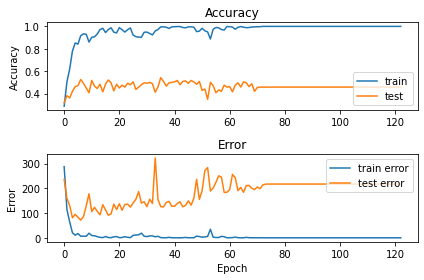

0.4576271186440678
CPU times: user 24.3 s, sys: 1.56 s, total: 25.8 s
Wall time: 9.58 s


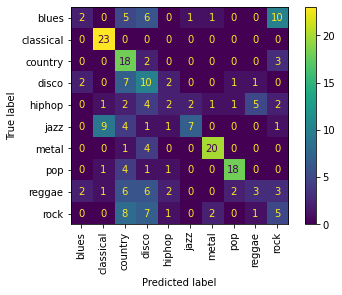

In [17]:
%%time
model = tf.keras.Sequential([  
    tf.keras.layers.Flatten(input_shape = [trainX.shape[1], trainX.shape[2], trainX.shape[3]]),
    tf.keras.layers.Dense(10)
])
## get output layer as logits for each class 
##(we can use softmax to get probabilities, but doing so makes model unstable:
# https://www.tensorflow.org/tutorials/quickstart/beginner
model.summary()
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

start = time.time()
fit = model.fit(trainX, trainY,
                validation_data = (testX,testY),
                epochs = 250,
                callbacks = [callback])
stop = time.time()
train_times.append(stop-start)


plot_results(fit)

probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(testX)
pred_labels = [np.argmax(prediction) for i,prediction in enumerate(predictions)]

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

ConfusionMatrixDisplay.from_predictions(
    y_true = [inv_labels[e] for i,e in enumerate(testY)],
    y_pred = [inv_labels[e] for i,e in enumerate(pred_labels)], 
    xticks_rotation= "vertical")
print(accuracy_score(testY,pred_labels))

2022-04-28 09:45:41.952658: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/software/CUDA/11.4.2/nvvm/lib64:/opt/software/CUDA/11.4.2/extras/CUPTI/lib64:/opt/software/CUDA/11.4.2/lib
2022-04-28 09:45:41.952766: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-04-28 09:45:41.954004: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To e

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 25860)             0         
                                                                 
 dense (Dense)               (None, 10)                258610    
                                                                 
Total params: 258,610
Trainable params: 258,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
23/23 [==============================] - 1s 10ms/step - loss: 397.1273 - accuracy: 0.2726 - val_loss: 278.5921 - val_accuracy: 0.3517
Epoch 2/250
23/23 [==============================] - 0s 3ms/step - loss: 123.2586 - accuracy: 0.4859 - val_loss: 130.9208 - val_accuracy: 0.4025
Epoch 3/250
23/23 [==============================] - 0s 3ms/step - loss: 43.6020 - accuracy: 0.6540 - val_loss: 94.4531 - val_accuracy: 0.4280
Epoch 4/250


Epoch 109/250
23/23 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 156.5040 - val_accuracy: 0.5466
Epoch 110/250
23/23 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 156.5040 - val_accuracy: 0.5466


<Figure size 1440x1080 with 0 Axes>

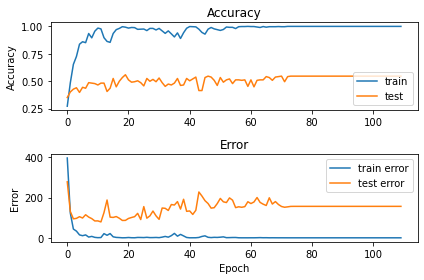

0.5466101694915254
CPU times: user 22 s, sys: 1.66 s, total: 23.7 s
Wall time: 12.5 s


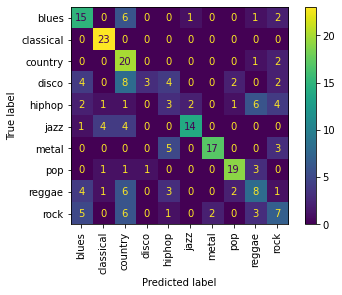

In [16]:
%%time
model = tf.keras.Sequential([  
    tf.keras.layers.Flatten(input_shape = [trainX.shape[1], trainX.shape[2], trainX.shape[3]]),
    tf.keras.layers.Dense(10)
])
## get output layer as logits for each class 
##(we can use softmax to get probabilities, but doing so makes model unstable:
# https://www.tensorflow.org/tutorials/quickstart/beginner
model.summary()
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

start = time.time()
fit = model.fit(trainX, trainY,
                validation_data = (testX,testY),
                epochs = 250,
                callbacks = [callback])
stop = time.time()
train_times.append(stop-start)


plot_results(fit)

probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(testX)
pred_labels = [np.argmax(prediction) for i,prediction in enumerate(predictions)]

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

ConfusionMatrixDisplay.from_predictions(
    y_true = [inv_labels[e] for i,e in enumerate(testY)],
    y_pred = [inv_labels[e] for i,e in enumerate(pred_labels)], 
    xticks_rotation= "vertical")
print(accuracy_score(testY,pred_labels))

### SimpleRNN
---


In [18]:
trainX.shape

(708, 1293, 20, 1)

In [19]:
trainY.shape

(708,)

In [20]:
type(trainX)

numpy.ndarray

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 1293, 64)          5440      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 14,346
Trainable params: 14,346
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
23/23 [==============================] - 11s 457ms/step - loss: 2.3281 - accuracy: 0.1864 - val_loss: 2.1626 - val_accuracy: 0.2542
Epoch 2/250
23/23 [==============================] - 10s 445ms/step - loss: 1.9711 - accuracy: 0.2994 - val_loss: 1.9832 - val_accuracy: 0.3136
Epoch 3/250
23/23 [=======

Epoch 52/250
23/23 [==============================] - 10s 444ms/step - loss: 0.1224 - accuracy: 0.9972 - val_loss: 2.4238 - val_accuracy: 0.4110
Epoch 53/250
23/23 [==============================] - 10s 444ms/step - loss: 0.1218 - accuracy: 0.9972 - val_loss: 2.4287 - val_accuracy: 0.4153
Epoch 54/250
23/23 [==============================] - 10s 445ms/step - loss: 0.1121 - accuracy: 0.9986 - val_loss: 2.4445 - val_accuracy: 0.4025
Epoch 55/250
23/23 [==============================] - 10s 445ms/step - loss: 0.1013 - accuracy: 0.9958 - val_loss: 2.5126 - val_accuracy: 0.3898
Epoch 56/250
23/23 [==============================] - 10s 445ms/step - loss: 0.0905 - accuracy: 1.0000 - val_loss: 2.4741 - val_accuracy: 0.4025
Epoch 57/250
23/23 [==============================] - 10s 445ms/step - loss: 0.0910 - accuracy: 0.9972 - val_loss: 2.4780 - val_accuracy: 0.4068
Epoch 58/250
23/23 [==============================] - 10s 444ms/step - loss: 0.0818 - accuracy: 1.0000 - val_loss: 2.5500 - val_ac

<Figure size 1440x1080 with 0 Axes>

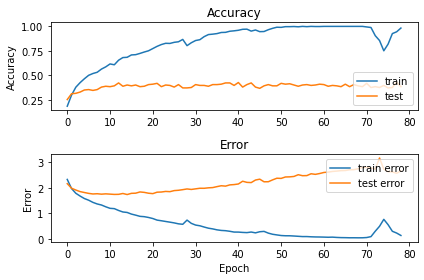

0.3855932203389831
CPU times: user 34min 49s, sys: 6min 31s, total: 41min 20s
Wall time: 13min 27s


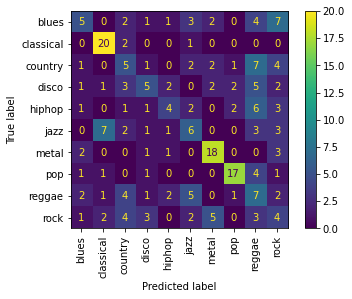

In [22]:
%%time
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, input_shape=trainX.shape[1:3],
                              return_sequences=True),
    tf.keras.layers.SimpleRNN(64),
    tf.keras.layers.Dense(10)])
model.summary()
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

start = time.time()
fit = model.fit(trainX, trainY,
                validation_data = (testX,testY),
                epochs = 250, 
                callbacks = [callback])
stop = time.time()
train_times.append(stop-start)


plot_results(fit)

probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(testX)
pred_labels = [np.argmax(prediction) for i,prediction in enumerate(predictions)]

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

ConfusionMatrixDisplay.from_predictions(
    y_true = [inv_labels[e] for i,e in enumerate(testY)],
    y_pred = [inv_labels[e] for i,e in enumerate(pred_labels)], 
    xticks_rotation= "vertical")
print(accuracy_score(testY,pred_labels))

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 1293, 64)          5440      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 14,346
Trainable params: 14,346
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
71/71 [==============================] - 32s 435ms/step - loss: 2.2983 - accuracy: 0.1667 - val_loss: 2.0106 - val_accuracy: 0.2881
Epoch 2/250
71/71 [==============================] - 31s 435ms/step - loss: 1.8995 - accuracy: 0.3362 - val_loss: 1.8627 - val_accuracy: 0.3305
Epoch 3/250
71/71 [=======

Epoch 52/250
71/71 [==============================] - 30s 428ms/step - loss: 0.0248 - accuracy: 0.9986 - val_loss: 2.6622 - val_accuracy: 0.4153
Epoch 53/250
71/71 [==============================] - 30s 429ms/step - loss: 0.0236 - accuracy: 0.9986 - val_loss: 2.6844 - val_accuracy: 0.4025
Epoch 54/250
71/71 [==============================] - 30s 429ms/step - loss: 0.0213 - accuracy: 0.9986 - val_loss: 2.7092 - val_accuracy: 0.4110
Epoch 55/250
71/71 [==============================] - 30s 429ms/step - loss: 0.0191 - accuracy: 0.9986 - val_loss: 2.7141 - val_accuracy: 0.4068
Epoch 56/250
71/71 [==============================] - 30s 428ms/step - loss: 0.0175 - accuracy: 0.9986 - val_loss: 2.7270 - val_accuracy: 0.4025
Epoch 57/250
71/71 [==============================] - 30s 429ms/step - loss: 0.0162 - accuracy: 0.9986 - val_loss: 2.7541 - val_accuracy: 0.4068
Epoch 58/250
71/71 [==============================] - 30s 428ms/step - loss: 0.0150 - accuracy: 1.0000 - val_loss: 2.7613 - val_ac

<Figure size 1440x1080 with 0 Axes>

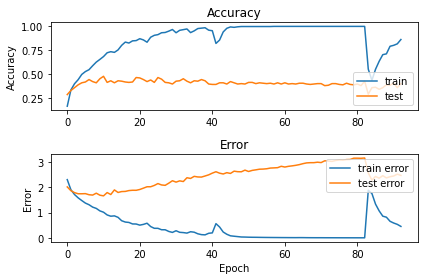

0.4025423728813559
CPU times: user 1h 57min 29s, sys: 23min 8s, total: 2h 20min 37s
Wall time: 47min 14s


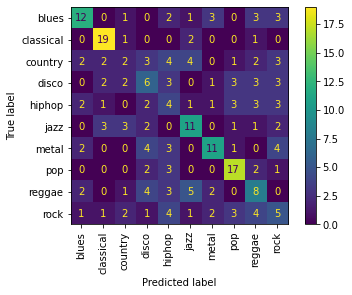

In [23]:
%%time
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, input_shape=trainX.shape[1:3],
                              return_sequences=True),
    tf.keras.layers.SimpleRNN(64),
    tf.keras.layers.Dense(10)])
model.summary()
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

start = time.time()
fit = model.fit(trainX, trainY,
                validation_data = (testX,testY),
                epochs = 100, batch_size =10,
                callbacks = [callback])
stop = time.time()
train_times.append(stop-start)


plot_results(fit)

probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(testX)
pred_labels = [np.argmax(prediction) for i,prediction in enumerate(predictions)]

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

ConfusionMatrixDisplay.from_predictions(
    y_true = [inv_labels[e] for i,e in enumerate(testY)],
    y_pred = [inv_labels[e] for i,e in enumerate(pred_labels)], 
    xticks_rotation= "vertical")
print(accuracy_score(testY,pred_labels))

### LSTM

2022-04-28 12:14:11.000000: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/software/CUDA/11.4.2/nvvm/lib64:/opt/software/CUDA/11.4.2/extras/CUPTI/lib64:/opt/software/CUDA/11.4.2/lib
2022-04-28 12:14:11.000067: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-04-28 12:14:11.001061: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To e

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1293, 64)          21760     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 59,594
Trainable params: 59,594
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
23/23 [==============================] - 15s 552ms/step - loss: 2.1596 - accuracy: 0.2528 - val_loss: 1.9371 - val_accuracy: 0.3347
Epoch 2/100
23/23 [=====================

23/23 [==============================] - 12s 519ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 2.4420 - val_accuracy: 0.5424
Epoch 52/100
23/23 [==============================] - 12s 518ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 2.4800 - val_accuracy: 0.5424
Epoch 53/100
23/23 [==============================] - 12s 518ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 2.5099 - val_accuracy: 0.5466
Epoch 54/100
23/23 [==============================] - 12s 518ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 2.5457 - val_accuracy: 0.5424
Epoch 55/100
23/23 [==============================] - 12s 520ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 2.5525 - val_accuracy: 0.5424
Epoch 56/100
23/23 [==============================] - 12s 520ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 2.5707 - val_accuracy: 0.5424
Epoch 57/100
23/23 [==============================] - 12s 519ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 2.5949 - val_accuracy: 0.542

<Figure size 1440x1080 with 0 Axes>

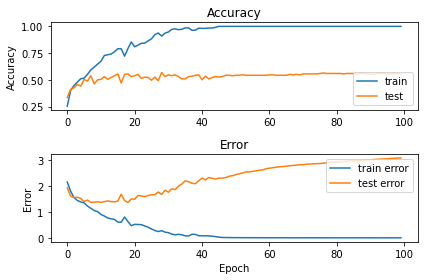

0.5508474576271186
CPU times: user 52min 22s, sys: 3min 12s, total: 55min 35s
Wall time: 19min 52s


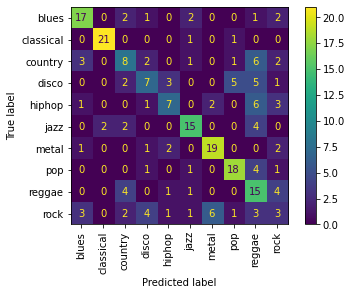

In [16]:
%%time
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=trainX.shape[1:3],
                         return_sequences=True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64, activation = "relu"),

    tf.keras.layers.Dense(10),
])
model.summary()
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

start = time.time()
fit = model.fit(trainX, trainY,
                validation_data = (testX,testY),
                epochs = 100, batch_size = 32,
                callbacks = [callback])
stop = time.time()
train_times.append(stop-start)


plot_results(fit)

probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(testX)
pred_labels = [np.argmax(prediction) for i,prediction in enumerate(predictions)]

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

ConfusionMatrixDisplay.from_predictions(
    y_true = [inv_labels[e] for i,e in enumerate(testY)],
    y_pred = [inv_labels[e] for i,e in enumerate(pred_labels)], 
    xticks_rotation= "vertical")
print(accuracy_score(testY,pred_labels))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1293, 64)          21760     
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 10)               

23/23 [==============================] - 17s 741ms/step - loss: 0.1588 - accuracy: 0.9887 - val_loss: 2.6490 - val_accuracy: 0.5085
Epoch 49/100
23/23 [==============================] - 17s 744ms/step - loss: 0.1841 - accuracy: 0.9816 - val_loss: 2.7140 - val_accuracy: 0.4958
Epoch 50/100
23/23 [==============================] - 17s 744ms/step - loss: 0.2273 - accuracy: 0.9590 - val_loss: 2.5556 - val_accuracy: 0.4915
Epoch 51/100
23/23 [==============================] - 17s 742ms/step - loss: 0.2053 - accuracy: 0.9675 - val_loss: 2.4861 - val_accuracy: 0.4958
Epoch 52/100
23/23 [==============================] - 17s 746ms/step - loss: 0.1739 - accuracy: 0.9746 - val_loss: 2.5419 - val_accuracy: 0.5085
Epoch 53/100
23/23 [==============================] - 17s 746ms/step - loss: 0.1483 - accuracy: 0.9915 - val_loss: 2.6249 - val_accuracy: 0.5169
Epoch 54/100
23/23 [==============================] - 17s 744ms/step - loss: 0.1313 - accuracy: 0.9958 - val_loss: 2.5769 - val_accuracy: 0.529

<Figure size 1440x1080 with 0 Axes>

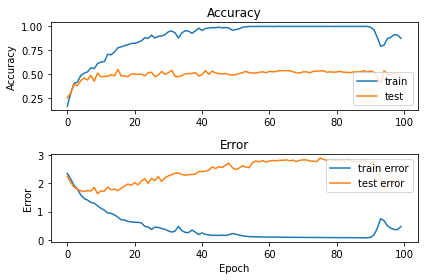

0.4745762711864407
CPU times: user 1h 36min 1s, sys: 12min 53s, total: 1h 48min 54s
Wall time: 28min 29s


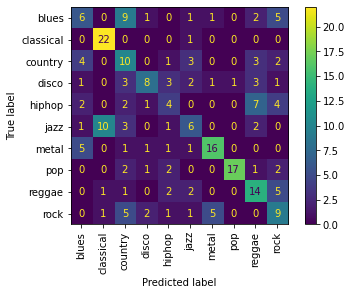

In [17]:
%%time
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=trainX.shape[1:3],
                         return_sequences=True),
    tf.keras.layers.LSTM(64, dropout=0.05, recurrent_dropout=0.1),
    tf.keras.layers.Dense(64, activation = "relu", 
                          kernel_regularizer = tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(rate=0.01),
    tf.keras.layers.Dense(32, activation = "relu", 
                          kernel_regularizer = tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(rate=0.01),
    tf.keras.layers.Dense(10, activation = "linear")
])
model.summary()
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

start = time.time()
fit = model.fit(trainX, trainY,
                validation_data = (testX,testY),
                epochs = 100, batch_size = 32,
                callbacks = [callback])
stop = time.time()
train_times.append(stop-start)


plot_results(fit)

probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(testX)
pred_labels = [np.argmax(prediction) for i,prediction in enumerate(predictions)]

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

ConfusionMatrixDisplay.from_predictions(
    y_true = [inv_labels[e] for i,e in enumerate(testY)],
    y_pred = [inv_labels[e] for i,e in enumerate(pred_labels)], 
    xticks_rotation= "vertical")
print(accuracy_score(testY,pred_labels))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 1293, 64)          21760     
                                                                 
 lstm_5 (LSTM)               (None, 64)                33024     
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 10)               

23/23 [==============================] - 20s 866ms/step - loss: 0.5718 - accuracy: 0.8362 - val_loss: 1.7669 - val_accuracy: 0.5212
Epoch 49/100
23/23 [==============================] - 20s 869ms/step - loss: 0.6262 - accuracy: 0.8263 - val_loss: 1.8436 - val_accuracy: 0.5339
Epoch 50/100
23/23 [==============================] - 20s 862ms/step - loss: 0.5785 - accuracy: 0.8446 - val_loss: 1.7750 - val_accuracy: 0.5508
Epoch 51/100
23/23 [==============================] - 20s 861ms/step - loss: 0.4768 - accuracy: 0.8757 - val_loss: 1.8682 - val_accuracy: 0.5127
Epoch 52/100
23/23 [==============================] - 20s 868ms/step - loss: 0.5074 - accuracy: 0.8588 - val_loss: 1.9220 - val_accuracy: 0.5381
Epoch 53/100
23/23 [==============================] - 20s 865ms/step - loss: 0.4370 - accuracy: 0.8884 - val_loss: 1.8151 - val_accuracy: 0.5042
Epoch 54/100
23/23 [==============================] - 20s 868ms/step - loss: 0.4006 - accuracy: 0.9068 - val_loss: 1.9088 - val_accuracy: 0.521

<Figure size 1440x1080 with 0 Axes>

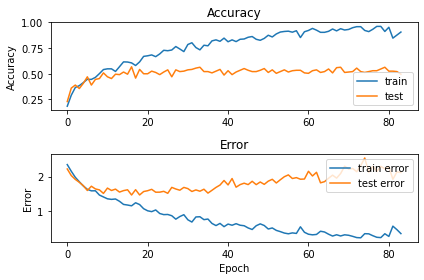

0.4957627118644068
CPU times: user 1h 44min 58s, sys: 16min 30s, total: 2h 1min 28s
Wall time: 29min 26s


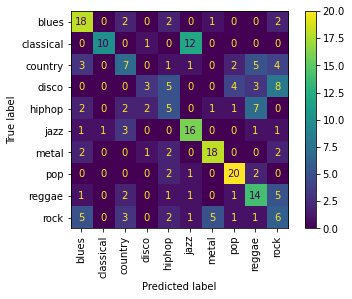

In [19]:
%%time
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, dropout=0.05, recurrent_dropout=0.1,
                         input_shape=trainX.shape[1:3],
                         return_sequences=True),
    tf.keras.layers.LSTM(64, dropout=0.05, recurrent_dropout=0.1),
    tf.keras.layers.Dense(64, activation = "relu", 
                          kernel_regularizer = tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(rate=0.01),
    tf.keras.layers.Dense(32, activation = "relu", 
                          kernel_regularizer = tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(rate=0.01),
    tf.keras.layers.Dense(10, activation = "linear")
])
model.summary()
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

start = time.time()
fit = model.fit(trainX, trainY,
                validation_data = (testX,testY),
                epochs = 100, batch_size = 32,
                callbacks = [callback])
stop = time.time()
train_times.append(stop-start)


plot_results(fit)

probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(testX)
pred_labels = [np.argmax(prediction) for i,prediction in enumerate(predictions)]

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

ConfusionMatrixDisplay.from_predictions(
    y_true = [inv_labels[e] for i,e in enumerate(testY)],
    y_pred = [inv_labels[e] for i,e in enumerate(pred_labels)], 
    xticks_rotation= "vertical")
print(accuracy_score(testY,pred_labels))

### CNN

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1293, 20, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 647, 10, 64)      0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 647, 10, 64)      256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 647, 10, 32)       18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 324, 5, 32)       0         
 2D)                                                             
                                                      

<Figure size 1440x1080 with 0 Axes>

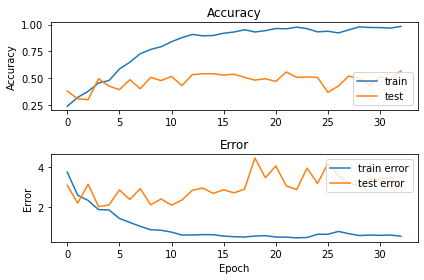

0.5677966101694916
CPU times: user 25min 36s, sys: 29.5 s, total: 26min 6s
Wall time: 4min 46s


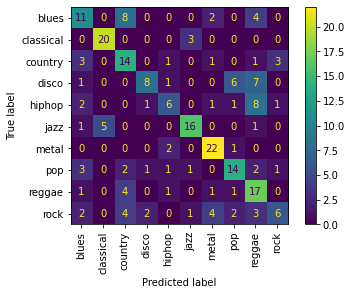

In [18]:
%%time
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size =(3,3), strides = (1,1),
                           activation = "selu", kernel_initializer='lecun_normal',
                           padding = "same",
                           input_shape=(trainX.shape[1], trainX.shape[2], trainX.shape[3])),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), padding = "same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=32, kernel_size =(3,3), strides = (1,1),
                           activation = "selu", kernel_initializer='lecun_normal',
                           padding = "same"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), padding = "same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=32, kernel_size =(2,2), strides = (1,1),
                           activation = "selu", kernel_initializer='lecun_normal',
                           padding = "same"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), padding = "same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=16, kernel_size =(1,1), strides = (1,1),
                           activation = "selu", kernel_initializer='lecun_normal',
                           padding = "same"),
    tf.keras.layers.MaxPool2D(pool_size=(1,1), padding = "same"),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = "selu",  
                          kernel_initializer='lecun_normal', 
                          kernel_regularizer = tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(10, activation = "linear")
])
## get output layer as logits for each class 
##(we can use softmax to get probabilities, but doing so makes model unstable:
# https://www.tensorflow.org/tutorials/quickstart/beginner
model.summary()
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

start = time.time()
fit = model.fit(trainX, trainY,
                validation_data = (testX,testY),
                epochs = 100, batch_size = 5,
                callbacks = [callback])
stop = time.time()
train_times.append(stop-start)


plot_results(fit)

probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(testX)
pred_labels = [np.argmax(prediction) for i,prediction in enumerate(predictions)]

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

ConfusionMatrixDisplay.from_predictions(
    y_true = [inv_labels[e] for i,e in enumerate(testY)],
    y_pred = [inv_labels[e] for i,e in enumerate(pred_labels)], 
    xticks_rotation= "vertical")
print(accuracy_score(testY,pred_labels))